In [1]:
import bittensor as bt

In [2]:
sub = bt.subtensor('ws://127.0.0.1:9946')

2024-04-14 12:32:17.062 |       INFO       | Connected to local network and ws://127.0.0.1:9946.


In [8]:
alpha_reserves = {}
tao_reserves = {}
for rec in sub.substrate.query_map(
    module="SubtensorModule",
    storage_function='DynamicAlphaReserve',
    params=[],
    block_hash=None,
).records:
    alpha_reserves[rec[0].value] = rec[1].value
    
for rec in sub.substrate.query_map(
        module="SubtensorModule",
        storage_function='DynamicTAOReserve',
        params=[],
        block_hash=None,
    ).records:
    tao_reserves[rec[0].value] = rec[1].value

print( 'alpha', alpha_reserves )
total_price = 0
print('tao', tao_reserves)
for key in alpha_reserves:
    if key in tao_reserves:
        price = tao_reserves[key] / alpha_reserves[key]
        total_price += price
        print(f"Price for {key}: {price}")
    else:
        print(f"No TAO reserve found for {key}")
print(f"Total price: {total_price}")


alpha {1: 3077000000000, 2: 8063484127032, 4: 20058313517780, 5: 48051000142040, 6: 112036556176340}
tao {1: 1018771139135, 2: 2004160048409, 4: 4001728536398, 5: 8000040701692, 6: 15997936596620}
Price for 1: 0.33109234291030226
Price for 2: 0.24854765221032182
Price for 4: 0.1995047356723588
Price for 5: 0.16649061784445013
Price for 6: 0.1427921130620977
Total price: 1.0884274616995309


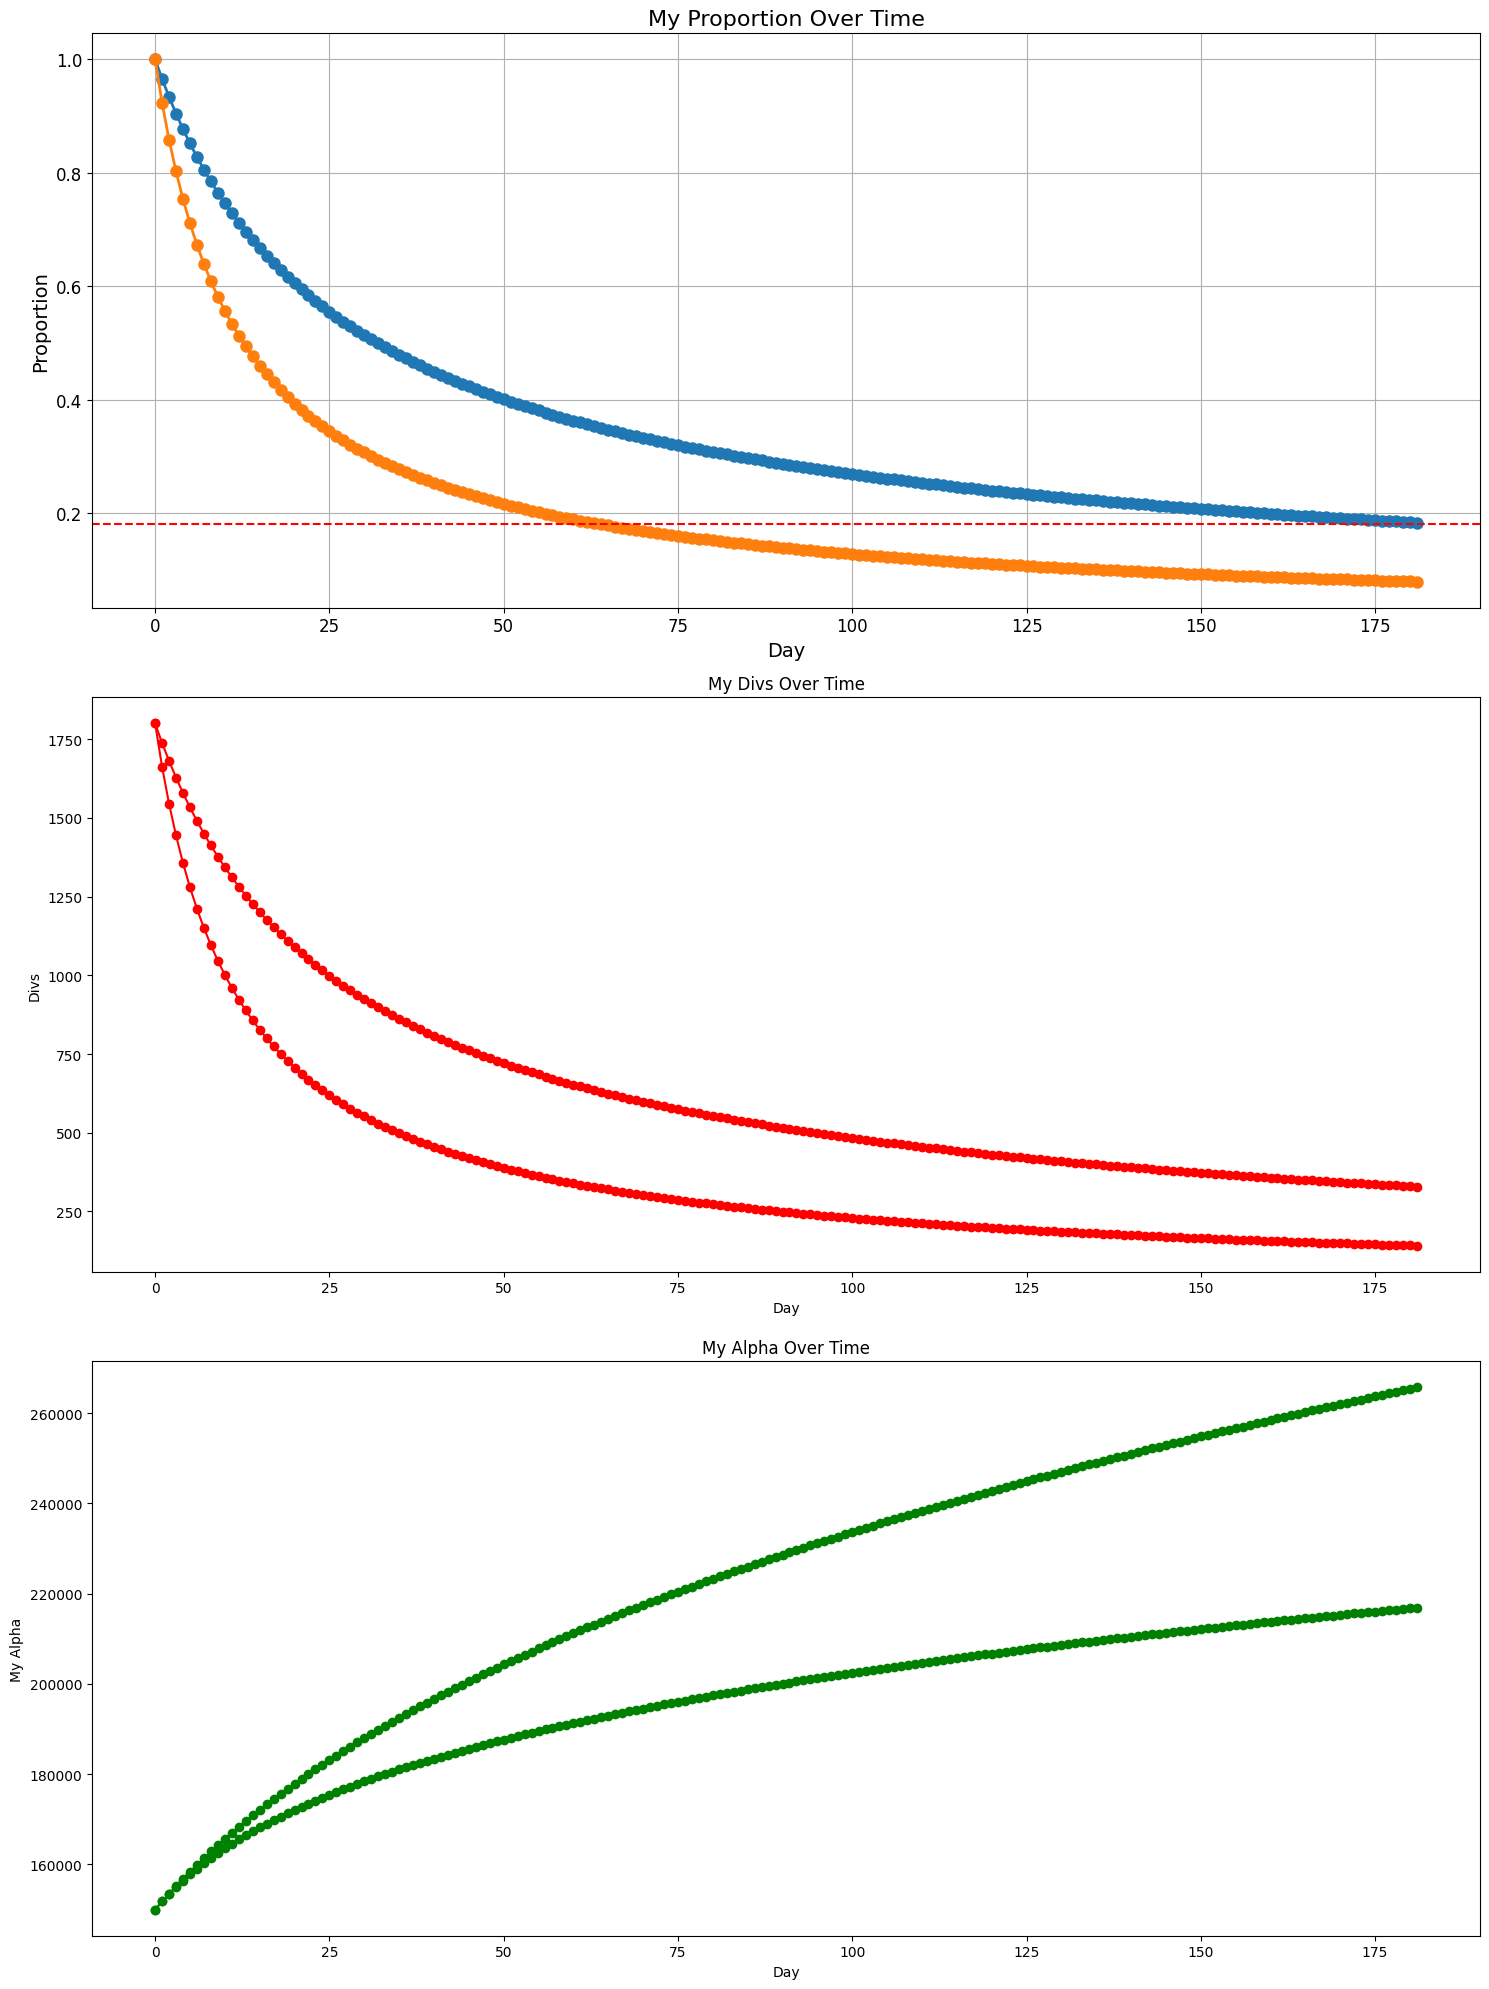

In [11]:
import matplotlib.pyplot as plt

my_alpha_A = [150000]
my_alpha_B = [150000]
total_alpha_A = my_alpha_A[0]
total_alpha_B = my_alpha_B[0]
proportions_A = []
proportions_B = []
divs_A = []
divs_B = []
tempo = 1
emission_per_tempo = int(7200/tempo)
period = int( (365/2) * tempo )
days = list(range(period))
for day in days:
    my_proportion_A = my_alpha_A[-1] / total_alpha_A
    my_proportion_B = my_alpha_B[-1] / total_alpha_B
    proportions_A.append(my_proportion_A)
    proportions_B.append(my_proportion_B)

    my_divs_A = 0.25 * my_proportion_A * emission_per_tempo
    my_divs_B = 0.25 * my_proportion_B * emission_per_tempo
    divs_A.append(my_divs_A)
    divs_B.append(my_divs_B)
    my_alpha_A.append(my_alpha_A[-1] + my_divs_A)
    my_alpha_B.append(my_alpha_B[-1] + my_divs_B)
    total_alpha_A += emission_per_tempo
    total_alpha_B += emission_per_tempo * 2

# Plotting the graphs
fig, axs = plt.subplots(3, 1, figsize=(15, 20))  # Increased figure size

# Proportion graph
axs[0].plot(days, proportions_A, marker='o', linestyle='-', linewidth=2, markersize=8)  # Made line and markers bigger
axs[0].plot(days, proportions_B, marker='o', linestyle='-', linewidth=2, markersize=8)  # Made line and markers bigger

axs[0].axhline(y=0.18, color='r', linestyle='--')  # Drawing 0.18 percent line
axs[0].set_title('My Proportion Over Time', fontsize=16)  # Increased title font size
axs[0].set_xlabel('Day', fontsize=14)  # Increased x label font size
axs[0].set_ylabel('Proportion', fontsize=14)  # Increased y label font size
axs[0].grid(True)  # Added grid
axs[0].tick_params(axis='both', which='major', labelsize=12)  # Increased tick label size

# Divs graph
axs[1].plot(days, divs_A, marker='o', linestyle='-', color='r')
axs[1].plot(days, divs_B, marker='o', linestyle='-', color='r')

axs[1].set_title('My Divs Over Time')
axs[1].set_xlabel('Day')
axs[1].set_ylabel('Divs')

# My Alpha graph
axs[2].plot(days, my_alpha_A[:-1], marker='o', linestyle='-', color='g')  # Including initial alpha
axs[2].plot(days, my_alpha_B[:-1], marker='o', linestyle='-', color='g')  # Including initial alpha
axs[2].set_title('My Alpha Over Time')
axs[2].set_xlabel('Day')
axs[2].set_ylabel('My Alpha')

plt.tight_layout()
plt.show()

In [8]:
proportions_A[-1]

0.182845632835794

In [9]:
proportions_B[-1]

0.07869791442904046